In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
# only in a Jupyter notebook
import matplotlib.pyplot as plt

In [2]:
housing_data = pd.read_csv("houses.csv")
housing_data.head()

,Id,MSSubClass,LotArea,LotConfig,OverallQual,LotFrontage,Neighborhood,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,Inside,7,65.0,CollgCr,5,3,8,856,2003,208.5
1,2,20,9600,FR2,6,80.0,Veenker,8,3,6,1262,1976,181.5
2,3,60,11250,Inside,7,68.0,CollgCr,5,3,6,920,2001,223.5
3,4,70,9550,Corner,7,60.0,Crawfor,5,3,7,756,1915,140.0
4,5,60,14260,FR2,8,84.0,NoRidge,5,4,9,1145,2000,250.0


In [3]:
housing_data.describe()

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
count,1134.000000,1134.000000,1134.000000,1134.000000,937.00000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000,1134.000000
mean,622.062610,54.056437,9487.280423,6.065256,68.40555,5.551146,2.828924,6.354497,1032.037037,1972.981481,174.783949
std,359.623823,38.760477,3866.279692,1.294012,20.13204,1.015560,0.734241,1.441257,385.301916,28.432646,65.428985
min,1.000000,20.000000,1300.000000,2.000000,21.00000,3.000000,1.000000,3.000000,0.000000,1885.000000,34.900000
25%,310.250000,20.000000,7508.750000,5.000000,59.00000,5.000000,2.000000,5.000000,796.000000,1955.000000,129.925000
50%,623.500000,50.000000,9246.500000,6.000000,70.00000,5.000000,3.000000,6.000000,990.000000,1975.000000,161.875000
75%,932.750000,60.000000,11250.000000,7.000000,80.00000,6.000000,3.000000,7.000000,1262.000000,2001.000000,207.500000
max,1243.000000,180.000000,39104.000000,10.000000,134.00000,8.000000,5.000000,11.000000,2223.000000,2009.000000,415.298000


In [4]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1134 entries, 0 to 1133
Data columns (total 13 columns):
Id              1134 non-null int64
MSSubClass      1134 non-null int64
LotArea         1134 non-null int64
LotConfig       1134 non-null object
OverallQual     1134 non-null int64
LotFrontage     937 non-null float64
Neighborhood    1134 non-null object
OverallCond     1134 non-null int64
BedroomAbvGr    1134 non-null int64
TotRmsAbvGrd    1134 non-null int64
TotalBsmtSF     1134 non-null int64
YearBuilt       1134 non-null int64
SalePrice       1134 non-null float64
dtypes: float64(2), int64(9), object(2)
memory usage: 115.3+ KB


In [5]:
#removing categorical columns
housing_data.drop(columns = ['LotConfig', 'Neighborhood'], inplace = True)
housing_data.head()

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
0,1,60,8450,7,65.0,5,3,8,856,2003,208.5
1,2,20,9600,6,80.0,8,3,6,1262,1976,181.5
2,3,60,11250,7,68.0,5,3,6,920,2001,223.5
3,4,70,9550,7,60.0,5,3,7,756,1915,140.0
4,5,60,14260,8,84.0,5,4,9,1145,2000,250.0


In [6]:
#filling Nan values with mean of that column
housing_data.fillna(housing_data.mean(), inplace = True)

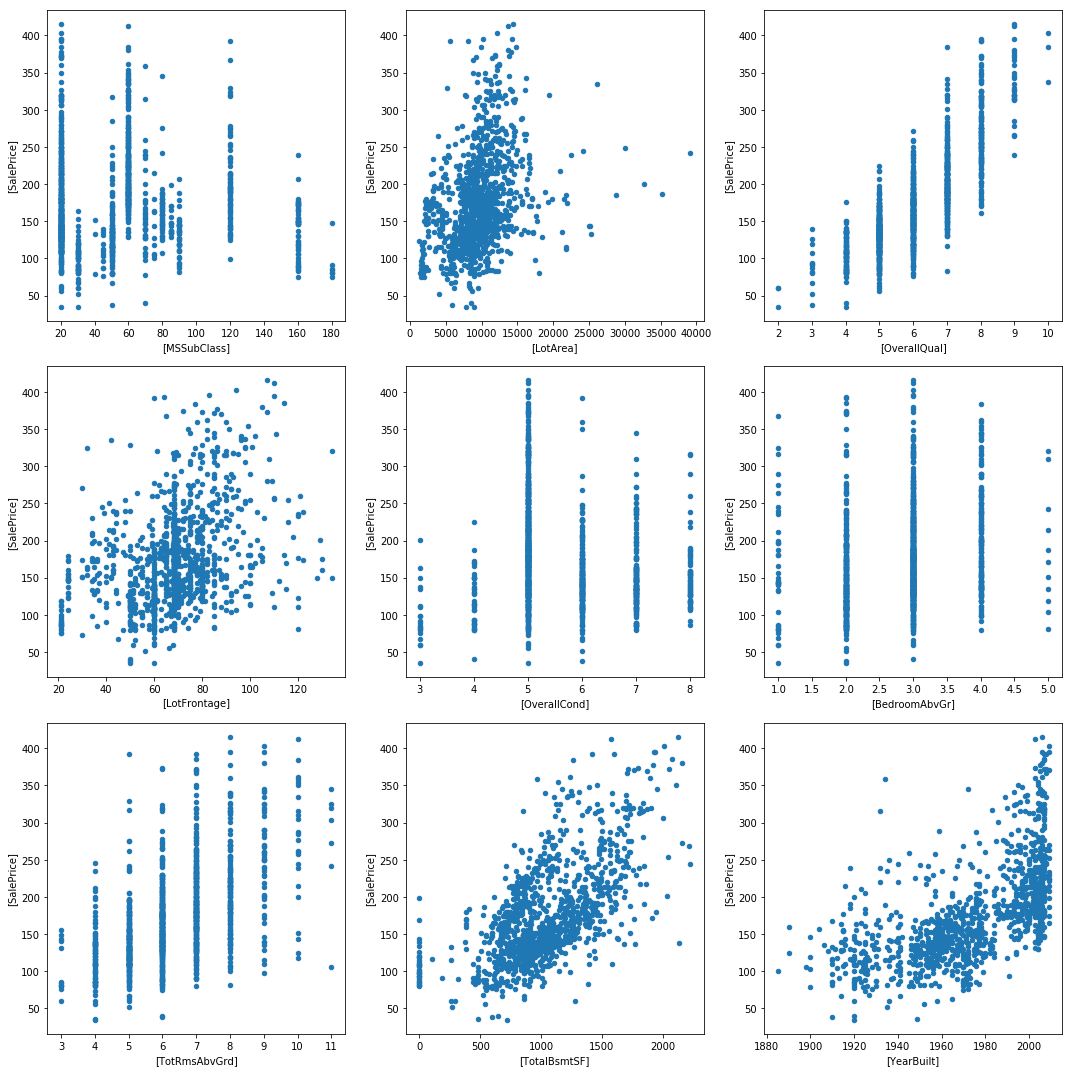

In [7]:
#plot features wrt SalePrice
fig, axs = plt.subplots(3, 3, figsize=(15,15))  
for i, col in enumerate(housing_data.columns.values[1:10]):
    housing_data.plot.scatter(x=[col], y=["SalePrice"], ax=axs[int(i/3), i%3])
plt.tight_layout()

In [8]:
housing_data.corr()

,Id,MSSubClass,LotArea,OverallQual,LotFrontage,OverallCond,BedroomAbvGr,TotRmsAbvGrd,TotalBsmtSF,YearBuilt,SalePrice
Id,1.000000,0.020962,-0.021398,-0.041649,-0.046417,-0.004983,0.017171,-0.016023,-0.029268,-0.006811,-0.040815
MSSubClass,0.020962,1.000000,-0.438615,0.131096,-0.484612,-0.110323,-0.119804,-0.003882,-0.246370,0.169341,-0.022218
LotArea,-0.021398,-0.438615,1.000000,0.135373,0.528662,-0.043152,0.289472,0.328523,0.292227,0.041598,0.333773
OverallQual,-0.041649,0.131096,0.135373,1.000000,0.206847,-0.158359,0.122305,0.422975,0.508698,0.610964,0.807843
LotFrontage,-0.046417,-0.484612,0.528662,0.206847,1.000000,-0.050520,0.299556,0.321128,0.326508,0.129005,0.370614
OverallCond,-0.004983,-0.110323,-0.043152,-0.158359,-0.050520,1.000000,-0.040336,-0.100438,-0.162348,-0.406579,-0.130668
BedroomAbvGr,0.017171,-0.119804,0.289472,0.122305,0.299556,-0.040336,1.000000,0.680392,0.048533,0.004245,0.211663
TotRmsAbvGrd,-0.016023,-0.003882,0.328523,0.422975,0.321128,-0.100438,0.680392,1.000000,0.218923,0.181168,0.547610
TotalBsmtSF,-0.029268,-0.246370,0.292227,0.508698,0.326508,-0.162348,0.048533,0.218923,1.000000,0.402473,0.617730
YearBuilt,-0.006811,0.169341,0.041598,0.610964,0.129005,-0.406579,0.004245,0.181168,0.402473,1.000000,0.610557


<div style = "direction : rtl">
    <font size = "4">
        با توجه به نمودار های بالا به طور تقریبی و چشمی و با توجه به جدول فوق، از آنجایی که میدانیم هر مشخصه ای که corrolation ش نسبت به مشخصه ی SalePrice به ۱ یا ۱- نزدیک تر باشد رابطه خطی تری با آن دارد، مشخصه ی OverallQual را انتخاب میکنیم. 
   </font>
</div>

In [9]:
import math

#with loops
def calculate_RMSE(weight, bias):
    error = 0
    for i in range(len(housing_data)):
        error += ((weight * housing_data.iloc[i]["OverallQual"] + bias - housing_data.iloc[i]["SalePrice"])**2)
    error /= len(housing_data)
    error = math.sqrt(error)
    return error

In [10]:
#guess parameters
print(calculate_RMSE(40, -60))

39.348387680071006


<div style = "direction : rtl">
    <font size = "4">
        نمودار زیر خط رسم شده روی نمودار OverallQual برحسب SalePrice را نشان میدهد. شیب خط را برابر با ۴۰ و عرض از مبدا را برابر با ۶۰- حدس زدم. 
   </font>
</div>

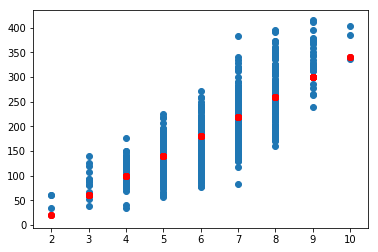

In [11]:
# housing_data.plot.scatter(x='OverallQual', y='SalePrice')
plt.scatter(x=housing_data["OverallQual"], y=housing_data["SalePrice"])
plt.scatter(x=housing_data["OverallQual"], y=40*housing_data["OverallQual"]-60, color = 'r')


In [12]:
def calculate_RMSE_vectorized(weight, bias):
    x_y = (weight * housing_data["OverallQual"] + bias - housing_data["SalePrice"])
    error = np.sqrt(np.sum(np.power(x_y, 2)) / len(housing_data))
    return error

In [13]:
print(calculate_RMSE_vectorized(40, -60))

39.348387680071006


In [16]:
#e
 
def KNN(input_df):
    data = housing_data.copy(deep = True)
    Prices = data["SalePrice"]
    data.drop(columns = ["Id", "SalePrice"], inplace = True)
    #standardize input
    standarded_input = (input_df - data.min())/(data.max() - data.min())
    #standardize data
    data = (data - data.min())/(data.max()- data.min())
    #calculate euclidean distance
    data['Distance'] = data.apply(lambda x : np.sqrt(np.sum(np.power(x - standarded_input.iloc[0, :], 2))), axis=1)
    data['SalePrice'] = Prices

    nearest_neighbours = data.nsmallest(10, 'Distance')

    estimated_price = nearest_neighbours["SalePrice"].mean()
    return estimated_price


inp = {}

l = [60, 8400, 7, 64, 5, 3, 8, 850, 2003]

inp["MSSubClass"] = [60]
inp["LotArea"] = [8400]
inp["OverallQual"] = [7]
inp["LotFrontage"] = [64]
inp["OverallCond"] = [5]
inp["BedroomAbvGr"] = [3]
inp["TotRmsAbvGrd"] = [8]
inp["TotalBsmtSF"] = [850]
inp["YearBuilt"] = [2003]
KNN(pd.DataFrame(inp))


202.19400000000002

In [17]:
dropped_housing_data = housing_data.drop(columns = ["Id", "SalePrice"])
estimated_prices = dropped_housing_data.apply(lambda x : KNN(pd.DataFrame(x)), axis = 1)
print(estimated_prices)

KeyboardInterrupt: 

In [ ]:
plt.scatter(x=housing_data["OverallQual"], y=housing_data["SalePrice"])
plt.scatter(x=housing_data["OverallQual"], y=estimated_prices, color = 'r')
plt.show()